In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## LOA Details
### Kakul Saydon G1 + G2
### July 20, 2023
### Paladin, SS, Arcana, GS

Read in parsed json

In [2]:
text_file = open('../../Documents/Lost Ark Logs/parsed/LostArk_2023-07-20-12-11-26.json')
data = text_file.read()
text_file.close()
data = data.strip('{"encounters"}:')

Serialize damage column data

In [3]:
df = pd.read_json(data)
df = pd.concat([df, df["mostDamageTakenEntity"].apply(pd.Series)], axis=1)
df.drop(columns = ['mostDamageTakenEntity'], inplace = True)

In [4]:
df['isPlayer'].unique()

array([False])

In [5]:
df.drop(columns = ['isPlayer'], inplace = True)

Convert duration to seconds and damage to millions

In [6]:
df['duration'] = df['duration'].apply(lambda x: x/1000)

In [7]:
df['damageTaken'] = df['damageTaken'].apply(lambda x: x/1000000)

In [8]:
df.rename(columns = {'duration' : 'duration (s)', 'name' : 'boss', 'damageTaken' : 'damageDealt (m)'}, inplace = True)

In [9]:
df.head()

,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,c317c9e1-610d-4e67-8f5a-35f1cd501d21,LostArk_2023-07-20-12-11-26_c317c9e1-610d-4e67...,54.653,Unicycling Clown,137.489550
1,ff394599-ce9c-456a-99e0-65f23821054c,LostArk_2023-07-20-12-11-26_ff394599-ce9c-456a...,72.803,Saydon,904.814032
2,ec0e2807-aa25-4026-ae8f-190fd4dbe3cc,LostArk_2023-07-20-12-11-26_ec0e2807-aa25-4026...,228.668,Saydon,2666.736437
3,dd0d0dc6-049f-45b8-95f3-7c1e6778050c,LostArk_2023-07-20-12-11-26_dd0d0dc6-049f-45b8...,663.961,Saydon,6127.621540
4,a42e7606-7ba8-4d0d-99d1-aaa661b4c5ff,LostArk_2023-07-20-12-11-26_a42e7606-7ba8-4d0d...,36.707,Kakul,336.274381


In [10]:
df.describe()

,duration (s),damageDealt (m)
count,66.000000,66.000000
mean,153.096182,1233.354333
std,149.223185,1059.312720
min,17.694000,137.489550
25%,66.039000,593.545192
50%,86.972000,810.948593
75%,198.473250,1725.645358
max,663.961000,6127.621540


In [11]:
df.shape

(66, 5)

In [12]:
df['boss'].unique()

array(['Unicycling Clown', 'Saydon', 'Kakul'], dtype=object)

In [13]:
df = df[df['boss'] != 'Unicycling Clown']

In [14]:
df.shape

(65, 5)

In [15]:
df['boss']

1     Saydon
2     Saydon
3     Saydon
4      Kakul
5      Kakul
       ...  
61     Kakul
62     Kakul
63     Kakul
64     Kakul
65     Kakul
Name: boss, Length: 65, dtype: object

In [16]:
df_g1 = df[df['boss'] == 'Saydon']

In [17]:
df_g2 = df[df['boss'] == 'Kakul']

## Gate 1

In [18]:
df_g1.head()

,encounterId,encounterFile,duration (s),boss,damageDealt (m)
1,ff394599-ce9c-456a-99e0-65f23821054c,LostArk_2023-07-20-12-11-26_ff394599-ce9c-456a...,72.803,Saydon,904.814032
2,ec0e2807-aa25-4026-ae8f-190fd4dbe3cc,LostArk_2023-07-20-12-11-26_ec0e2807-aa25-4026...,228.668,Saydon,2666.736437
3,dd0d0dc6-049f-45b8-95f3-7c1e6778050c,LostArk_2023-07-20-12-11-26_dd0d0dc6-049f-45b8...,663.961,Saydon,6127.621540


### Gate 1 damage dealt by pull

<AxesSubplot:ylabel='damageDealt (m)'>

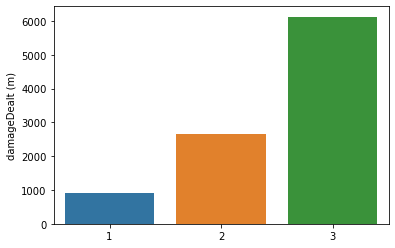

In [19]:
sns.barplot(data=df_g1, x=df_g1.index, y="damageDealt (m)")

## Gate 2

In [20]:
df_g2.head()

,encounterId,encounterFile,duration (s),boss,damageDealt (m)
4,a42e7606-7ba8-4d0d-99d1-aaa661b4c5ff,LostArk_2023-07-20-12-11-26_a42e7606-7ba8-4d0d...,36.707,Kakul,336.274381
5,20a1a290-bc9a-4a47-bfb8-543676f9723b,LostArk_2023-07-20-12-11-26_20a1a290-bc9a-4a47...,210.124,Kakul,1570.946199
6,8ce7afab-8af0-493b-8baf-a398506a5971,LostArk_2023-07-20-12-11-26_8ce7afab-8af0-493b...,89.194,Kakul,922.132325
7,250b54b5-bc34-4c7d-a029-813d30eb43f4,LostArk_2023-07-20-12-11-26_250b54b5-bc34-4c7d...,31.454,Kakul,309.570756
8,866d780f-f13a-4c27-abd2-8cabd3a6c890,LostArk_2023-07-20-12-11-26_866d780f-f13a-4c27...,127.479,Kakul,903.867507


In [21]:
df_g2.reset_index(inplace = True)

In [22]:
df_g2.shape

(62, 6)

### Gate 2 damage by pull

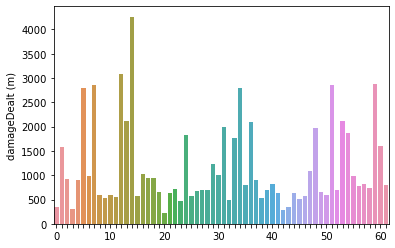

In [23]:
g = sns.barplot(data=df_g2, x=df_g2.index, y="damageDealt (m)")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [24]:
df_g2[["damageDealt (m)", "duration (s)"]].describe()

,damageDealt (m),duration (s)
count,62.000000,62.000000
mean,1154.269749,146.520371
std,861.130199,138.011544
min,227.560073,17.694000
25%,593.545192,66.039000
50%,798.514150,86.972000
75%,1596.303532,179.013250
max,4262.597673,620.902000


In [25]:
g2_summary = []
g2_summary.append(df_g2[["damageDealt (m)"]].describe())

## LOA Details
### Kakul Saydon G1 + G2
### July 21, 2023
### Paladin, SS, Arcana, GS

Read in parsed json

In [26]:
text_file = open('../../Documents/Lost Ark Logs/parsed/LostArk_2023-07-21-09-47-22.json')
data = text_file.read()
text_file.close()
data = data.strip('{"encounters"}:')

Serialize damage column data

In [27]:
df = pd.read_json(data)
df = pd.concat([df, df["mostDamageTakenEntity"].apply(pd.Series)], axis=1)
df.drop(columns = ['mostDamageTakenEntity'], inplace = True)

In [28]:
df['isPlayer'].unique()

array([False])

In [29]:
df.drop(columns = ['isPlayer'], inplace = True)

Convert duration to seconds and damage to millions

In [30]:
df['duration'] = df['duration'].apply(lambda x: x/1000)

In [31]:
df['damageTaken'] = df['damageTaken'].apply(lambda x: x/1000000)

In [32]:
df.rename(columns = {'duration' : 'duration (s)', 'name' : 'boss', 'damageTaken' : 'damageDealt (m)'}, inplace = True)

In [33]:
df.head()

,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,1a1560e0-b077-4bae-a647-5898de902a6e,LostArk_2023-07-21-09-47-22_1a1560e0-b077-4bae...,52.393,Unicycling Clown,87.190950
1,2cbbdc6b-a27b-4b88-a5aa-c179860ddc0d,LostArk_2023-07-21-09-47-22_2cbbdc6b-a27b-4b88...,159.720,Saydon,2303.966736
2,43975767-6b75-4ceb-bc67-483d489f5099,LostArk_2023-07-21-09-47-22_43975767-6b75-4ceb...,245.998,Kakul,5657.704332
3,32ff46e7-0070-4c17-90c0-0be5f57bc3e1,LostArk_2023-07-21-09-47-22_32ff46e7-0070-4c17...,441.221,Encore-Desiring Kakul-Saydon,2534.363409
4,f302405d-f276-4e26-a339-d43628014d6d,LostArk_2023-07-21-09-47-22_f302405d-f276-4e26...,307.697,Gehenna Helkasirs,6257.381672


In [34]:
df.describe()

,duration (s),damageDealt (m)
count,54.000000,54.000000
mean,235.066000,2923.896412
std,175.993145,4978.284268
min,24.001000,4.771538
25%,69.405250,746.856641
50%,192.803500,1911.401903
75%,359.936250,2859.354224
max,661.410000,29990.510916


In [35]:
df.shape

(54, 5)

In [36]:
df['boss'].unique()

array(['Unicycling Clown', 'Saydon', 'Kakul',
       'Encore-Desiring Kakul-Saydon', 'Gehenna Helkasirs',
       "Prokel's Spiritual Echo", 'Phantom Apostle', 'Ashtarot',
       'Primordial Nightmare', 'Cloud Mole'], dtype=object)

In [37]:
df = df[df['boss'].isin(['Saydon', 'Kakul'])]

In [38]:
df['boss'].unique()

array(['Saydon', 'Kakul'], dtype=object)

In [39]:
df.shape

(41, 5)

In [40]:
df = df.iloc[2:]

In [41]:
df_g1 = df[df['boss'] == 'Saydon']

In [42]:
df_g2 = df[df['boss'] == 'Kakul']

In [43]:
df_g2.reset_index(inplace = True)
df_g1.reset_index(inplace = True)

## Gate 1

In [44]:
df_g1.head()

,index,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,13,7e134c11-d94b-4fcc-92c1-e2f41fa10985,LostArk_2023-07-21-09-47-22_7e134c11-d94b-4fcc...,305.503,Saydon,2997.273769
1,14,cce21857-b36c-4546-b320-ef4e79e326e4,LostArk_2023-07-21-09-47-22_cce21857-b36c-4546...,661.410,Saydon,5418.740033
2,17,96835f81-91fb-43d8-89ff-19b8ccf1879c,LostArk_2023-07-21-09-47-22_96835f81-91fb-43d8...,363.100,Saydon,3404.598130
3,18,6fbdd060-f3c4-478e-b697-6429ed178e11,LostArk_2023-07-21-09-47-22_6fbdd060-f3c4-478e...,656.852,Saydon,6127.621540


### Gate 1 damage dealt by pull

<AxesSubplot:ylabel='damageDealt (m)'>

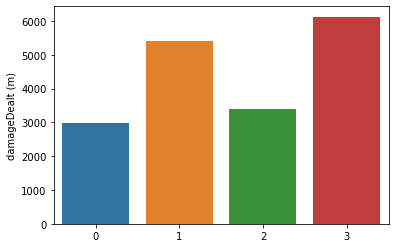

In [45]:
sns.barplot(data=df_g1, x=df_g1.index, y="damageDealt (m)")

## Gate 2

In [46]:
df_g2.head()

,index,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,19,db2309e0-e5c9-4c76-b325-1613d26d6fa2,LostArk_2023-07-21-09-47-22_db2309e0-e5c9-4c76...,379.792,Kakul,2601.971026
1,20,0d56d109-7528-4dad-a113-45f827ffe68b,LostArk_2023-07-21-09-47-22_0d56d109-7528-4dad...,438.762,Kakul,2767.406133
2,21,876c6475-6937-4f52-abb9-5cca3fb62145,LostArk_2023-07-21-09-47-22_876c6475-6937-4f52...,117.551,Kakul,1063.337545
3,22,8740eca1-1f2e-438c-af2f-7034277c5ab5,LostArk_2023-07-21-09-47-22_8740eca1-1f2e-438c...,24.001,Kakul,294.357597
4,23,99a0e763-8dcb-4a8c-8417-57493eaa919a,LostArk_2023-07-21-09-47-22_99a0e763-8dcb-4a8c...,448.703,Kakul,2885.256192


In [47]:
df_g2.reset_index(inplace = True)

In [48]:
df_g2.shape

(35, 7)

### Gate 2 damage dealt by pull

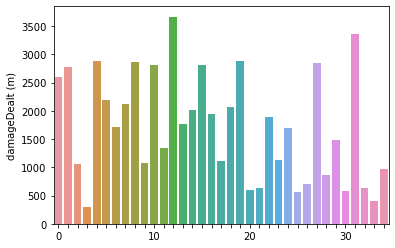

In [49]:
g = sns.barplot(data=df_g2, x=df_g2.index, y="damageDealt (m)")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [50]:
df_g2[["damageDealt (m)", "duration (s)"]].describe()

,damageDealt (m),duration (s)
count,35.000000,35.000000
mean,1725.288828,223.735114
std,950.889451,162.060955
min,294.357597,24.001000
25%,918.562980,94.667000
50%,1721.168025,181.307000
75%,2684.688579,365.118500
max,3665.666590,643.897000


In [51]:
g2_summary.append(df_g2[["damageDealt (m)"]].describe())

## LOA Details
### Kakul Saydon G1 + G2
### July 21, 2023
### Paladin, SS, Arcana, Berserker

Read in parsed json

In [52]:
text_file = open('../../Documents/Lost Ark Logs/parsed/LostArk_2023-07-21-20-57-36.json')
data = text_file.read()
text_file.close()
data = data.strip('{"encounters"}:')

Serialize damage column data

In [53]:
df = pd.read_json(data)
df = pd.concat([df, df["mostDamageTakenEntity"].apply(pd.Series)], axis=1)
df.drop(columns = ['mostDamageTakenEntity'], inplace = True)

In [54]:
df['isPlayer'].unique()

array([False])

In [55]:
df.drop(columns = ['isPlayer'], inplace = True)

Convert duration to seconds and damage to millions

In [56]:
df['duration'] = df['duration'].apply(lambda x: x/1000)

In [57]:
df['damageTaken'] = df['damageTaken'].apply(lambda x: x/1000000)

In [58]:
df.rename(columns = {'duration' : 'duration (s)', 'name' : 'boss', 'damageTaken' : 'damageDealt (m)'}, inplace = True)

In [59]:
df.head()

,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,a8c5a9f8-5fd9-411f-bbf0-679c52d0abe0,LostArk_2023-07-21-20-57-36_a8c5a9f8-5fd9-411f...,417.072,Israfel,13852.826255
1,5d98a2b0-1bcb-4ba4-9dbb-628e87750f4a,LostArk_2023-07-21-20-57-36_5d98a2b0-1bcb-4ba4...,146.592,Unicycling Clown,137.489550
2,91706e8e-1766-4344-9d13-824afb94dbc9,LostArk_2023-07-21-20-57-36_91706e8e-1766-4344...,192.185,Saydon,1936.952992
3,2e6b232e-9069-4891-9b7b-a644cae57588,LostArk_2023-07-21-20-57-36_2e6b232e-9069-4891...,48.902,Saydon,591.311558
4,76687325-05eb-4528-8cff-83aa6e84545c,LostArk_2023-07-21-20-57-36_76687325-05eb-4528...,660.675,Saydon,6127.621540


In [60]:
df.describe()

,duration (s),damageDealt (m)
count,19.000000,19.000000
mean,209.047158,2240.255654
std,194.108534,3191.723507
min,21.390000,137.489550
25%,84.992500,802.677696
50%,128.097000,1007.899970
75%,298.173500,2345.265473
max,660.675000,13852.826255


In [61]:
df.shape

(19, 5)

In [62]:
df['boss'].unique()

array(['Israfel', 'Unicycling Clown', 'Saydon', 'Kakul'], dtype=object)

In [63]:
df = df[df['boss'].isin(['Saydon', 'Kakul'])]

In [64]:
df['boss'].unique()

array(['Saydon', 'Kakul'], dtype=object)

In [65]:
df.shape

(17, 5)

In [66]:
df_g1 = df[df['boss'] == 'Saydon']

In [67]:
df_g2 = df[df['boss'] == 'Kakul']

In [68]:
df_g2.reset_index(inplace = True)
df_g1.reset_index(inplace = True)

## Gate 1

In [69]:
df_g1.head()

,index,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,2,91706e8e-1766-4344-9d13-824afb94dbc9,LostArk_2023-07-21-20-57-36_91706e8e-1766-4344...,192.185,Saydon,1936.952992
1,3,2e6b232e-9069-4891-9b7b-a644cae57588,LostArk_2023-07-21-20-57-36_2e6b232e-9069-4891...,48.902,Saydon,591.311558
2,4,76687325-05eb-4528-8cff-83aa6e84545c,LostArk_2023-07-21-20-57-36_76687325-05eb-4528...,660.675,Saydon,6127.621540


### Gate 1 damage dealt by pull

<AxesSubplot:ylabel='damageDealt (m)'>

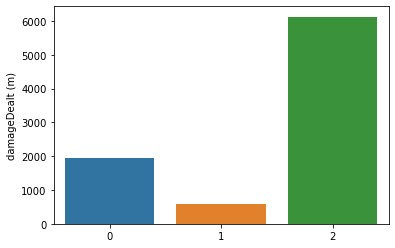

In [70]:
sns.barplot(data=df_g1, x=df_g1.index, y="damageDealt (m)")

## Gate 2

In [71]:
df_g2.head()

,index,encounterId,encounterFile,duration (s),boss,damageDealt (m)
0,5,41ca39fa-330e-486f-b1b8-d346e718f846,LostArk_2023-07-21-20-57-36_41ca39fa-330e-486f...,414.895,Kakul,2753.577953
1,6,00bc6f23-a632-49fe-a819-cd151ac028d4,LostArk_2023-07-21-20-57-36_00bc6f23-a632-49fe...,54.325,Kakul,572.392622
2,7,8f735cda-f347-49d7-963a-d49a1f18cdc8,LostArk_2023-07-21-20-57-36_8f735cda-f347-49d7...,90.697,Kakul,822.091862
3,8,21b36276-2b27-47a3-8090-0326568d211e,LostArk_2023-07-21-20-57-36_21b36276-2b27-47a3...,21.390,Kakul,218.462130
4,9,cc2740aa-bb3b-4079-90cc-7721a843eb19,LostArk_2023-07-21-20-57-36_cc2740aa-bb3b-4079...,79.288,Kakul,820.105930


In [72]:
df_g2.reset_index(inplace = True)

In [73]:
df_g2.shape

(14, 7)

### Gate 2 damage dealy by pull

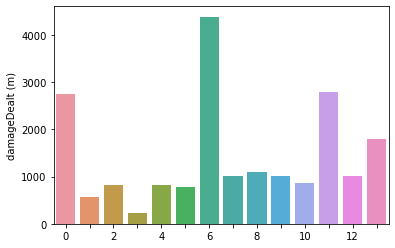

In [74]:
g = sns.barplot(data=df_g2, x=df_g2.index, y="damageDealt (m)")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [75]:
df_g2[["damageDealt (m)", "duration (s)"]].describe()

,damageDealt (m),duration (s)
count,14.000000,14.000000
mean,1422.761110,179.033571
std,1137.323934,172.876413
min,218.462130,21.390000
25%,820.602413,82.140250
50%,1005.488685,104.829000
75%,1624.321988,175.173000
max,4386.942032,614.661000


In [76]:
g2_summary.append(df_g2[["damageDealt (m)"]].describe())

# G2 session summaries

### 7/20 Paladin, Arcana, SS, GS
Pulls: **62**
<br> - Mean Duration: **147 seconds**
<br> - Mean Damage: **1.15b**
<br> - Max Damage: **4.26b**

### 7/21 Paladin, Arcana, SS, GS
Pulls: **35**
<br> - Mean Duration: **223 seconds**
<br> - Mean Damage: **1.72b**
<br> - Max Damage: **3.67b**

### 7/21 Paladin, Arcana, SS, Berserker
Pulls: **14**
<br> - Mean Duration: **179 seconds**
<br> - Mean Damage: **1.42b**
<br> - Max Damage: **4.39b**

In [77]:
type(g2_summary)

list

In [78]:
type(g2_summary[0])

pandas.core.frame.DataFrame

In [79]:
g2_summary[0]['damageDealt (m)']

count      62.000000
mean     1154.269749
std       861.130199
min       227.560073
25%       593.545192
50%       798.514150
75%      1596.303532
max      4262.597673
Name: damageDealt (m), dtype: float64

In [80]:
df_sum = pd.DataFrame()

In [81]:
for i in range(0, len(g2_summary)):
    df_sum[i] = g2_summary[i]['damageDealt (m)']

In [82]:
df_sum

,0,1,2
count,62.000000,35.000000,14.000000
mean,1154.269749,1725.288828,1422.761110
std,861.130199,950.889451,1137.323934
min,227.560073,294.357597,218.462130
25%,593.545192,918.562980,820.602413
50%,798.514150,1721.168025,1005.488685
75%,1596.303532,2684.688579,1624.321988
max,4262.597673,3665.666590,4386.942032


In [83]:
df_sum = df_sum.transpose()

## Fatigue Analysis

[Text(0.5, 0, '# of pulls'),
 Text(0, 0.5, 'average damage dealt'),
 Text(0.5, 1.0, 'mean damage by number of pulls per session')]

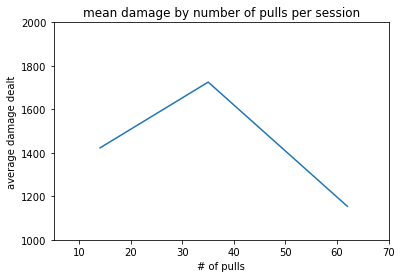

In [84]:
fig, ax = plt.subplots()

g = sns.lineplot(data=df_sum, x="count", y="mean", ax = ax)

ax.set_xlim(5, 70)
ax.set_ylim(1000, 2000)

g.set(xlabel = '# of pulls', ylabel = 'average damage dealt', title = 'mean damage by number of pulls per session')

[Text(0.5, 0, '# of pulls'),
 Text(0, 0.5, 'max damage dealt'),
 Text(0.5, 1.0, 'max damage by number of pulls per session')]

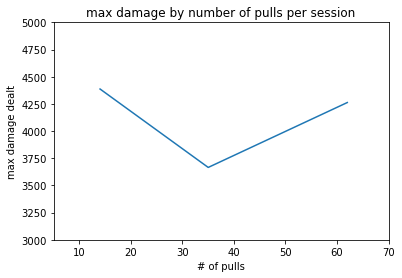

In [85]:
fig, ax = plt.subplots()

g = sns.lineplot(data=df_sum, x="count", y="max", ax = ax)

ax.set_xlim(5, 70)
ax.set_ylim(3000, 5000)

g.set(xlabel = '# of pulls', ylabel = 'max damage dealt', title = 'max damage by number of pulls per session')